<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Problem:</font></h2>


In this project, we delve deep into the thriving sector of __online retail__ by analyzing a __transactional dataset__ from a UK-based retailer. This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through __customer segmentation__. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the __K-means clustering__ algorithm. This segmentation will allow us to understand the distinct __profiles__ and preferences of different customer groups. 


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Objectives:</font></h2>


- **Data Cleaning & Transformation**: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.

    
- **Feature Engineering**: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.

    
- **Data Preprocessing**: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.

    
- **Customer Segmentation using K-Means Clustering**: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.

    
- **Cluster Analysis & Evaluation**: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
First of all, I will import all the necessary libraries that we will use throughout the project. This generally includes libraries for data manipulation, data visualization, and others based on the specific needs of the project:

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline

In [3]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [4]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

In [6]:
df = pd.read_csv("OnlineRetail.csv", encoding="ISO-8859-1")

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Dataset Description:</font></h2>

| __Variable__   | __Description__ |
|     :---       |       :---      |      
| __InvoiceNo__  | Code representing each unique transaction.  If this code starts with letter 'c', it indicates a cancellation. |
| __StockCode__  | Code uniquely assigned to each distinct product. |
| __Description__| Description of each product. |
| __Quantity__   | The number of units of a product in a transaction. |
| __InvoiceDate__| The date and time of the transaction. |
| __UnitPrice__  | The unit price of the product in sterling. |
| __CustomerID__ | Identifier uniquely assigned to each customer. |
| __Country__    | The country of the customer. |


In [7]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Now, I am going to generate summary statistics to gain initial insights into the data distribution:

In [9]:
# Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [10]:
# Summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


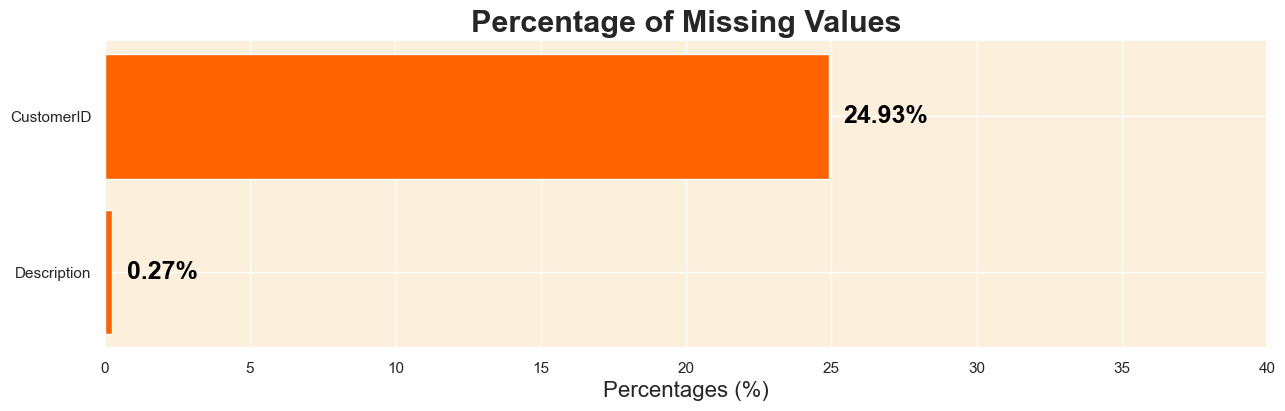

In [11]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the bar horizontal chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Handling Missing Values Strategy:</font></h3>

- __`CustomerID` (24.93% missing values)__
   - The `CustomerID` column contains nearly a quarter of missing data. This column is essential for clustering customers and creating a recommendation system. Imputing such a large percentage of missing values might introduce significant bias or noise into the analysis.
    
   - Moreover, since the clustering is based on customer behavior and preferences, it's crucial to have accurate data on customer identifiers. Therefore, removing the rows with missing `CustomerID`s seems to be the most reasonable approach to maintain the integrity of the clusters and the analysis.

    
- __`Description` (0.27% missing values)__
   - The `Description` column has a minor percentage of missing values. However, it has been noticed that there are inconsistencies in the data where the same `StockCode` does not always have the same `Description`. This indicates data quality issues and potential errors in the product descriptions.
    
   - Given these inconsistencies, imputing the missing descriptions based on `StockCode` might not be reliable. Moreover, since the missing percentage is quite low, it would be prudent to remove the rows with missing `Description`s to avoid propagating errors and inconsistencies into the subsequent analyses.
   
By removing rows with missing values in the `CustomerID` and `Description` columns, we aim to construct a cleaner and more reliable dataset, which is essential for achieving accurate clustering and creating an effective recommendation system.


In [12]:
# Extracting rows with missing values in 'CustomerID' or 'Description' columns
df[df['CustomerID'].isnull() | df['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [13]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df = df.dropna(subset=['CustomerID', 'Description'])

In [14]:
# Verifying the removal of missing values
df.isnull().sum().sum()

0

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Next, I am going to recognize duplicate rows in the dataset:

In [15]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


In [16]:
# Displaying the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df.drop_duplicates(inplace=True)

The dataset contains 5225 duplicate rows that need to be removed.


In [17]:
# Getting the number of rows in the dataframe
df.shape[0]

401604

In [18]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


In [19]:
# Finding the percentage of cancelled transactions
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

# Printing the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.21%


In [20]:
# Finding the number of unique stock codes
unique_stock_codes = df['StockCode'].nunique()

# Printing the number of unique stock codes
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3684


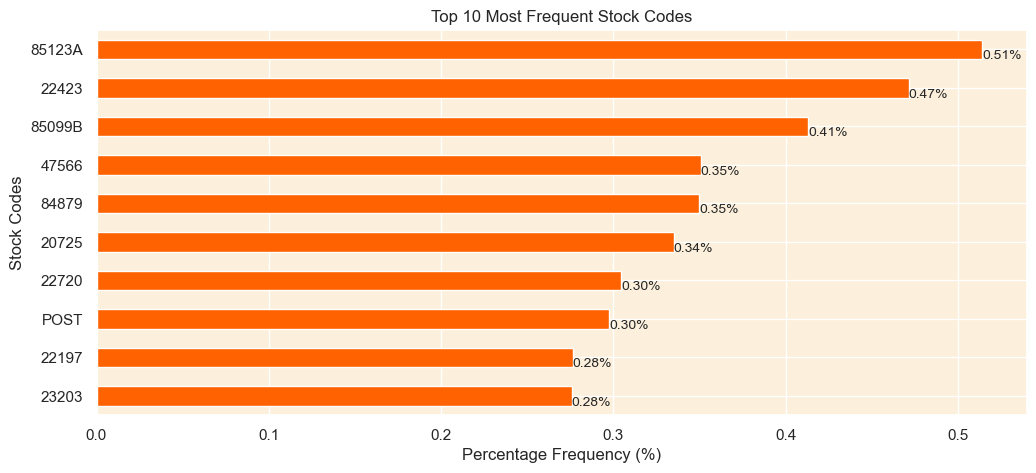

In [21]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

In [22]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
Name: count, dtype: int64


In [23]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Let's calculate the percentage of records with these anomalous stock codes:    

In [24]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.48%


In [25]:
# Removing rows with anomalous stock codes from the dataset
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

In [26]:
# Getting the number of rows in the dataframe
df.shape[0]

399689

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
First, I will calculate the occurrence count of each unique description in the dataset. Then, I will plot the top 30 descriptions. This visualization will give a clear view of the highest occurring descriptions in the dataset:

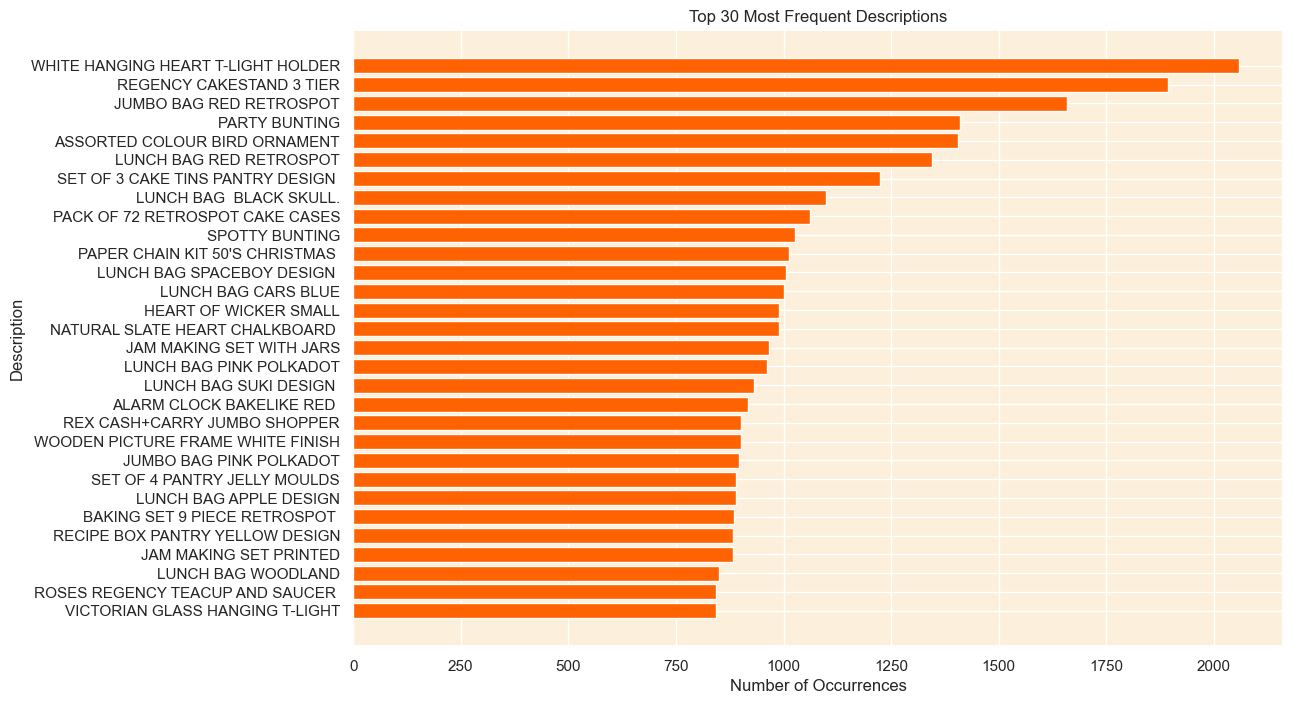

In [27]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['Description'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

# Show the plot
plt.show()

In [28]:
# Find unique descriptions containing lowercase characters
lowercase_descriptions = df['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

# Print the unique descriptions containing lowercase characters
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


In [29]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Calculate the percentage of records with service-related descriptions
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

# Print the percentage of records with service-related descriptions
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

# Remove rows with service-related information in the description
df = df[~df['Description'].isin(service_related_descriptions)]

# Standardize the text to uppercase to maintain uniformity across the dataset
df['Description'] = df['Description'].str.upper()

The percentage of records with service-related descriptions in the dataset is: 0.02%


In [30]:
# Getting the number of rows in the dataframe
df.shape[0]

399606

In [31]:
df['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [32]:
df[df['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,33.000000
mean,420.515152
std,2176.713608
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000


In [33]:
# Removing records with a unit price of zero to avoid potential data entry errors
df = df[df['UnitPrice'] > 0]

In [34]:
# Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)

In [35]:
# Getting the number of rows in the dataframe
df.shape[0]

399573

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In order to create a comprehensive customer-centric dataset for clustering and recommendation, the following features can be engineered from the available data:

In [36]:
# Convert InvoiceDate to datetime type with dayfirst=True
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True, errors='coerce')

# Check for rows with invalid dates
invalid_dates = df[df['InvoiceDate'].isna()]
if not invalid_dates.empty:
    print("Rows with invalid InvoiceDate:")
    print(invalid_dates)

# Drop rows with invalid dates, if necessary
df.dropna(subset=['InvoiceDate'], inplace=True)

# Extract only the date part
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)

Rows with invalid InvoiceDate:
       InvoiceNo StockCode                          Description  Quantity  \
17224     538521     21754             HOME BUILDING BLOCK WORD         3   
17225     538521     21755             LOVE BUILDING BLOCK WORD         3   
17226     538521     22072    RED RETROSPOT TEA CUP AND SAUCER          8   
17227     538521     22846           BREAD BIN DINER STYLE RED          1   
17228     538521     22849           BREAD BIN DINER STYLE MINT         1   
...          ...       ...                                  ...       ...   
382268   C579886     22197                       POPCORN HOLDER        -1   
382269   C579886     23146       TRIPLE HOOK ANTIQUE IVORY ROSE        -1   
382270   C579887     84946         ANTIQUE SILVER T-LIGHT GLASS        -1   
382271   C579887     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        -1   
382272   C579887     23490     T-LIGHT HOLDER HANGING LOVE BIRD        -3   

       InvoiceDate  UnitPrice  CustomerID   

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Now, __customer_data__ dataframe contains the __`Days_Since_Last_Purchase`__ feature:

In [37]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,12347.0,95
1,12348.0,220
2,12350.0,311
3,12352.0,274
4,12355.0,96


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Note: </font></h3>
    
- I've named the customer-centric dataframe as __customer_data__, which will eventually contain all the customer-based features we plan to create.

In [38]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12347.0,95,5,1467
1,12348.0,220,1,268
2,12350.0,311,1,196
3,12352.0,274,2,150
4,12355.0,96,1,240


In [39]:
# Calculate the total spend by each customer
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12347.0,95,5,1467,2540.29,508.058
1,12348.0,220,1,268,327.00,327.000
2,12350.0,311,1,196,294.40,294.400
3,12352.0,274,2,150,336.08,168.040
4,12355.0,96,1,240,459.40,459.400


In [40]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data dataframe
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,12347.0,95,5,1467,2540.29,508.058,79
1,12348.0,220,1,268,327.00,327.000,4
2,12350.0,311,1,196,294.40,294.400,16
3,12352.0,274,2,150,336.08,168.040,18
4,12355.0,96,1,240,459.40,459.400,13


In [41]:
# Extract day of week and hour from InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12347.0,95,5,1467,2540.29,508.058,79,3.476190,0,14
1,12348.0,220,1,268,327.00,327.000,4,0.000000,2,10
2,12350.0,311,1,196,294.40,294.400,16,0.000000,2,16
3,12352.0,274,2,150,336.08,168.040,18,3.941176,4,14
4,12355.0,96,1,240,459.40,459.400,13,0.000000,0,13


In [42]:
df['Country'].value_counts(normalize=True).head()

Country
United Kingdom    0.892232
France            0.022629
Germany           0.022369
EIRE              0.016947
Spain             0.005794
Name: proportion, dtype: float64

In [43]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12347.0,95,5,1467,2540.29,508.058,79,3.476190,0,14,0
1,12348.0,220,1,268,327.00,327.000,4,0.000000,2,10,0
2,12350.0,311,1,196,294.40,294.400,16,0.000000,2,16,0
3,12352.0,274,2,150,336.08,168.040,18,3.941176,4,14,0
4,12355.0,96,1,240,459.40,459.400,13,0.000000,0,13,0


In [44]:
# Display feature distribution
customer_data['Is_UK'].value_counts()

Is_UK
1    2703
0     289
Name: count, dtype: int64

In [45]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_data dataframe
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate
0,12347.0,95,5,1467,2540.29,508.058,79,3.476190,0,14,0,0.0,0.0
1,12348.0,220,1,268,327.00,327.000,4,0.000000,2,10,0,0.0,0.0
2,12350.0,311,1,196,294.40,294.400,16,0.000000,2,16,0,0.0,0.0
3,12352.0,274,2,150,336.08,168.040,18,3.941176,4,14,0,0.0,0.0
4,12355.0,96,1,240,459.40,459.400,13,0.000000,0,13,0,0.0,0.0


In [46]:
# Extract month and year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending 
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12347.0,95,5,1467,2540.29,508.058,79,3.476190,0,14,0,0.0,0.0,635.0725,202.698040,-71.165
1,12348.0,220,1,268,327.00,327.000,4,0.000000,2,10,0,0.0,0.0,327.0000,0.000000,0.000
2,12350.0,311,1,196,294.40,294.400,16,0.000000,2,16,0,0.0,0.0,294.4000,0.000000,0.000
3,12352.0,274,2,150,336.08,168.040,18,3.941176,4,14,0,0.0,0.0,168.0400,90.071262,127.380
4,12355.0,96,1,240,459.40,459.400,13,0.000000,0,13,0,0.0,0.0,459.4000,0.000000,0.000


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

We've done a great job so far! We have created a dataset that focuses on our customers, using a variety of new features that give us a deeper understanding of their buying patterns and preferences.

In [47]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

# Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()

In [48]:
customer_data.head(10)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12347.0,95,5,1467,2540.29,508.058,79,3.47619,0,14,0,0,0.0,635.0725,202.69804,-71.165
1,12348.0,220,1,268,327.0,327.0,4,0.0,2,10,0,0,0.0,327.0,0.0,0.0
2,12350.0,311,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0
3,12352.0,274,2,150,336.08,168.04,18,3.941176,4,14,0,0,0.0,168.04,90.071262,127.38
4,12355.0,96,1,240,459.4,459.4,13,0.0,0,13,0,0,0.0,459.4,0.0,0.0
5,12356.0,128,1,370,481.46,481.46,21,0.0,3,12,0,0,0.0,481.46,0.0,0.0
6,12357.0,182,1,2708,6207.67,6207.67,131,0.0,5,16,0,0,0.0,6207.67,0.0,0.0
7,12358.0,3,2,242,928.06,464.03,12,-7.3125,2,10,0,0,0.0,464.03,83.679016,-118.34
8,12359.0,9,4,959,3404.48,851.12,138,-2.0,5,14,0,1,0.25,851.12,821.105484,264.584
9,12362.0,30,5,1063,1916.79,383.358,91,-0.240385,3,15,0,0,0.0,479.1975,199.445405,79.505


In [49]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      2992 non-null   string 
 1   Days_Since_Last_Purchase        2992 non-null   Int64  
 2   Total_Transactions              2992 non-null   Int64  
 3   Total_Products_Purchased        2992 non-null   Int64  
 4   Total_Spend                     2992 non-null   Float64
 5   Average_Transaction_Value       2992 non-null   Float64
 6   Unique_Products_Purchased       2992 non-null   Int64  
 7   Average_Days_Between_Purchases  2992 non-null   Float64
 8   Day_Of_Week                     2992 non-null   Int32  
 9   Hour                            2992 non-null   Int32  
 10  Is_UK                           2992 non-null   Int64  
 11  Cancellation_Frequency          2992 non-null   Int64  
 12  Cancellation_Rate               29

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Let's review the descriptions of the columns in our newly created `customer_data` dataset:

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Customer Dataset Description:</font></h2>

| __Variable__                       | __Description__ |
|     :---                           |       :---      |
| __CustomerID__                     | Identifier uniquely assigned to each customer, used to distinguish individual customers. |
| __Days_Since_Last_Purchase__       | The number of days that have passed since the customer's last purchase. |
| __Total_Transactions__             | The total number of transactions made by the customer. |
| __Total_Products_Purchased__       | The total quantity of products purchased by the customer across all transactions. |
| __Total_Spend__                    | The total amount of money the customer has spent across all transactions. |
| __Average_Transaction_Value__      | The average value of the customer's transactions, calculated as total spend divided by the number of transactions. |
| __Unique_Products_Purchased__      | The number of different products the customer has purchased. |
| __Average_Days_Between_Purchases__ | The average number of days between consecutive purchases made by the customer. |
| __Day_Of_Week__                    | The day of the week when the customer prefers to shop, represented numerically (0 for Monday, 6 for Sunday). |
| __Hour__                           | The hour of the day when the customer prefers to shop, represented in a 24-hour format. |
| __Is_UK__                          | A binary variable indicating whether the customer is based in the UK (1) or not (0). |
| __Cancellation_Frequency__         | The total number of transactions that the customer has cancelled. |
| __Cancellation_Rate__              | The proportion of transactions that the customer has cancelled, calculated as cancellation frequency divided by total transactions. |
| __Monthly_Spending_Mean__          | The average monthly spending of the customer. |
| __Monthly_Spending_Std__           | The standard deviation of the customer's monthly spending, indicating the variability in their spending pattern. |
| __Spending_Trend__                 | A numerical representation of the trend in the customer's spending over time. A positive value indicates an increasing trend, a negative value indicates a decreasing trend, and a value close to zero indicates a stable trend. |


In [50]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,12347.0,95,5,1467,2540.29,508.058,79,3.47619,0,14,0,0,0.0,635.0725,202.69804,-71.165,1,0
1,12348.0,220,1,268,327.0,327.0,4,0.0,2,10,0,0,0.0,327.0,0.0,0.0,1,0
2,12350.0,311,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,1,0
3,12352.0,274,2,150,336.08,168.04,18,3.941176,4,14,0,0,0.0,168.04,90.071262,127.38,1,0
4,12355.0,96,1,240,459.4,459.4,13,0.0,0,13,0,0,0.0,459.4,0.0,0.0,1,0


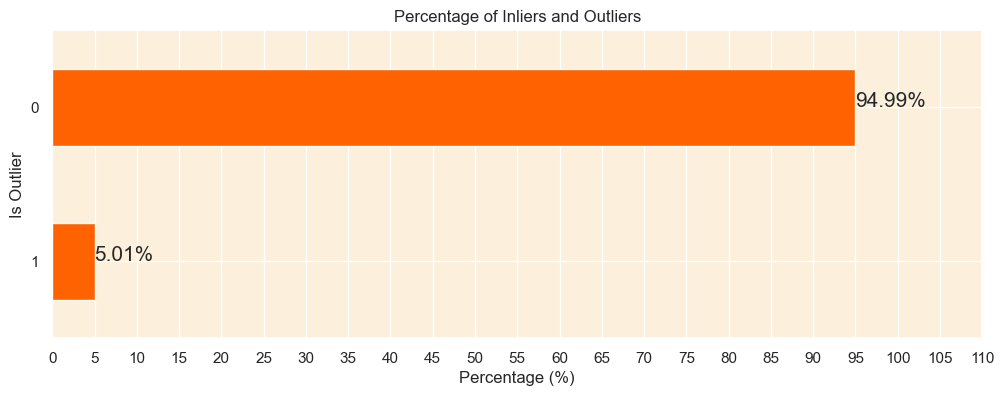

In [51]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

In [52]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

In [53]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]

2842

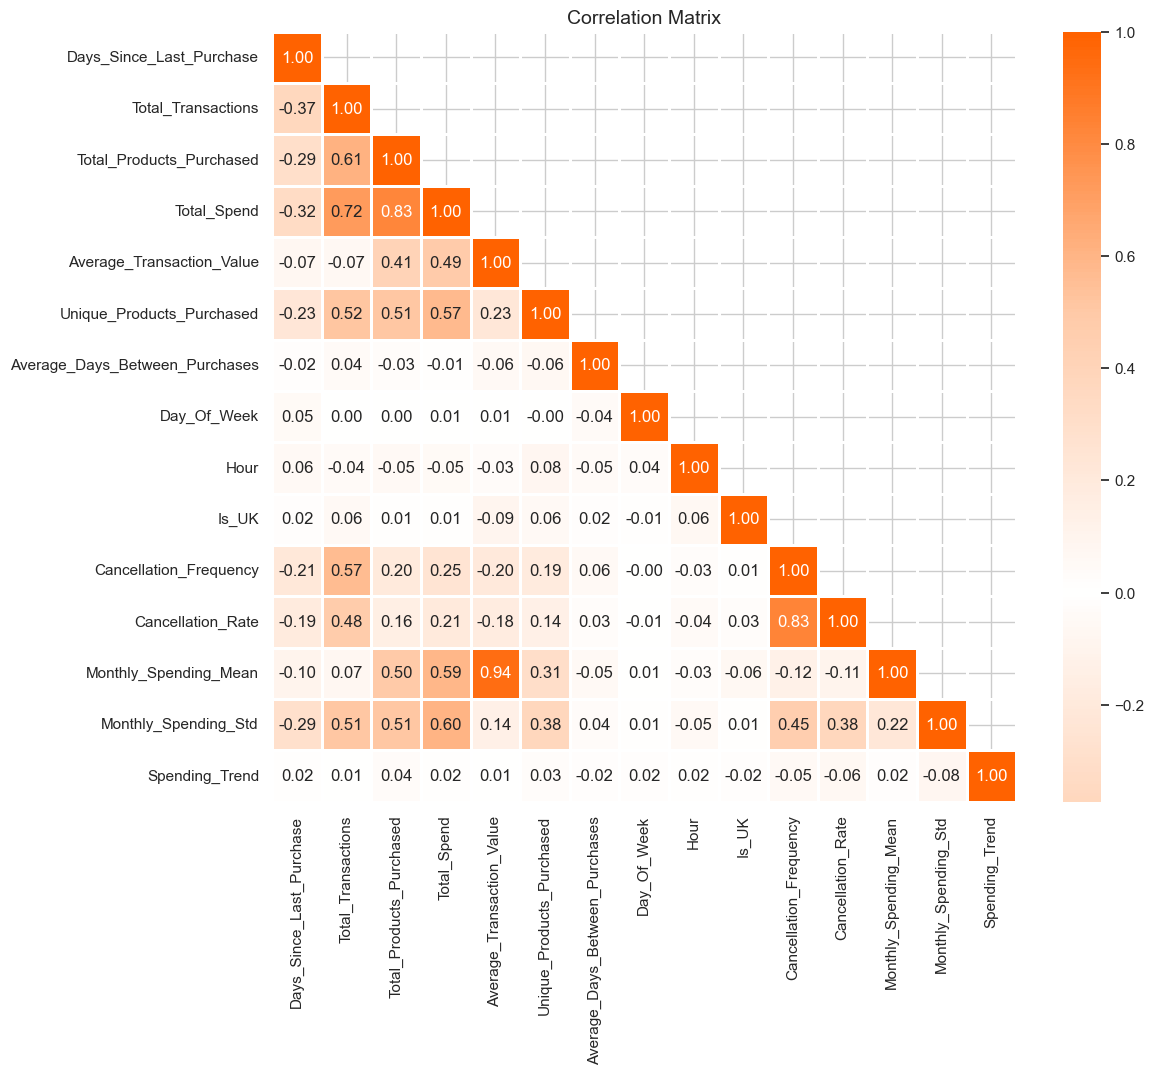

In [54]:
# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'CustomerID' column
corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

Before we move forward with the clustering and dimensionality reduction, it's imperative to scale our features. This step holds significant importance, especially in the context of distance-based algorithms like K-means and dimensionality reduction methods like PCA. Here's why:

  - __For K-means Clustering__: K-means relies heavily on the concept of '__distance__' between data points to form clusters. When features are not on a similar scale, features with larger values can disproportionately influence the clustering outcome, potentially leading to incorrect groupings.
  
    
  - __For PCA__: PCA aims to find the directions where the data varies the most. When features are not scaled, those with larger values might dominate these components, not accurately reflecting the underlying patterns in the data.


In [55]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12347.0,-0.392127,1.087453,2.000322,2.407966,0.895491,0.963549,0.051002,0,0.646029,0,-0.495568,-0.4212,1.153509,0.579298,-0.335372
1,12348.0,0.513839,-0.682110,-0.298291,-0.481060,0.158900,-0.839663,-0.149638,2,-1.053590,0,-0.495568,-0.4212,0.022711,-0.630573,0.039546
2,12350.0,1.173383,-0.682110,-0.436323,-0.523613,0.026275,-0.551149,-0.149638,2,1.495838,0,-0.495568,-0.4212,-0.096950,-0.630573,0.039546
3,12352.0,0.905217,-0.239719,-0.524510,-0.469208,-0.487790,-0.503064,0.077841,4,0.646029,0,-0.495568,-0.4212,-0.560761,-0.092953,0.710622
4,12355.0,-0.384880,-0.682110,-0.351970,-0.308237,0.697538,-0.623278,-0.149638,0,0.221124,0,-0.495568,-0.4212,0.508693,-0.630573,0.039546


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Why We Need Dimensionality Reduction? </font></h3>

- __Multicollinearity Detected__: In the previous steps, we identified that our dataset contains multicollinear features. Dimensionality reduction can help us remove redundant information and alleviate the multicollinearity issue.

    
- __Better Clustering with K-means__: Since K-means is a distance-based algorithm, having a large number of features can sometimes dilute the meaningful underlying patterns in the data. By reducing the dimensionality, we can help K-means to find more compact and well-separated clusters.    
   
    
- __Noise Reduction__: By focusing only on the most important features, we can potentially remove noise in the data, leading to more accurate and stable clusters.    
   
    
- __Enhanced Visualization__: In the context of customer segmentation, being able to visualize customer groups in two or three dimensions can provide intuitive insights. Dimensionality reduction techniques can facilitate this by reducing the data to a few principal components which can be plotted easily.
    
    
- __Improved Computational Efficiency__: Reducing the number of features can speed up the computation time during the modeling process, making our clustering algorithm more efficient.


Let's proceed to select an appropriate dimensionality reduction method to our data.

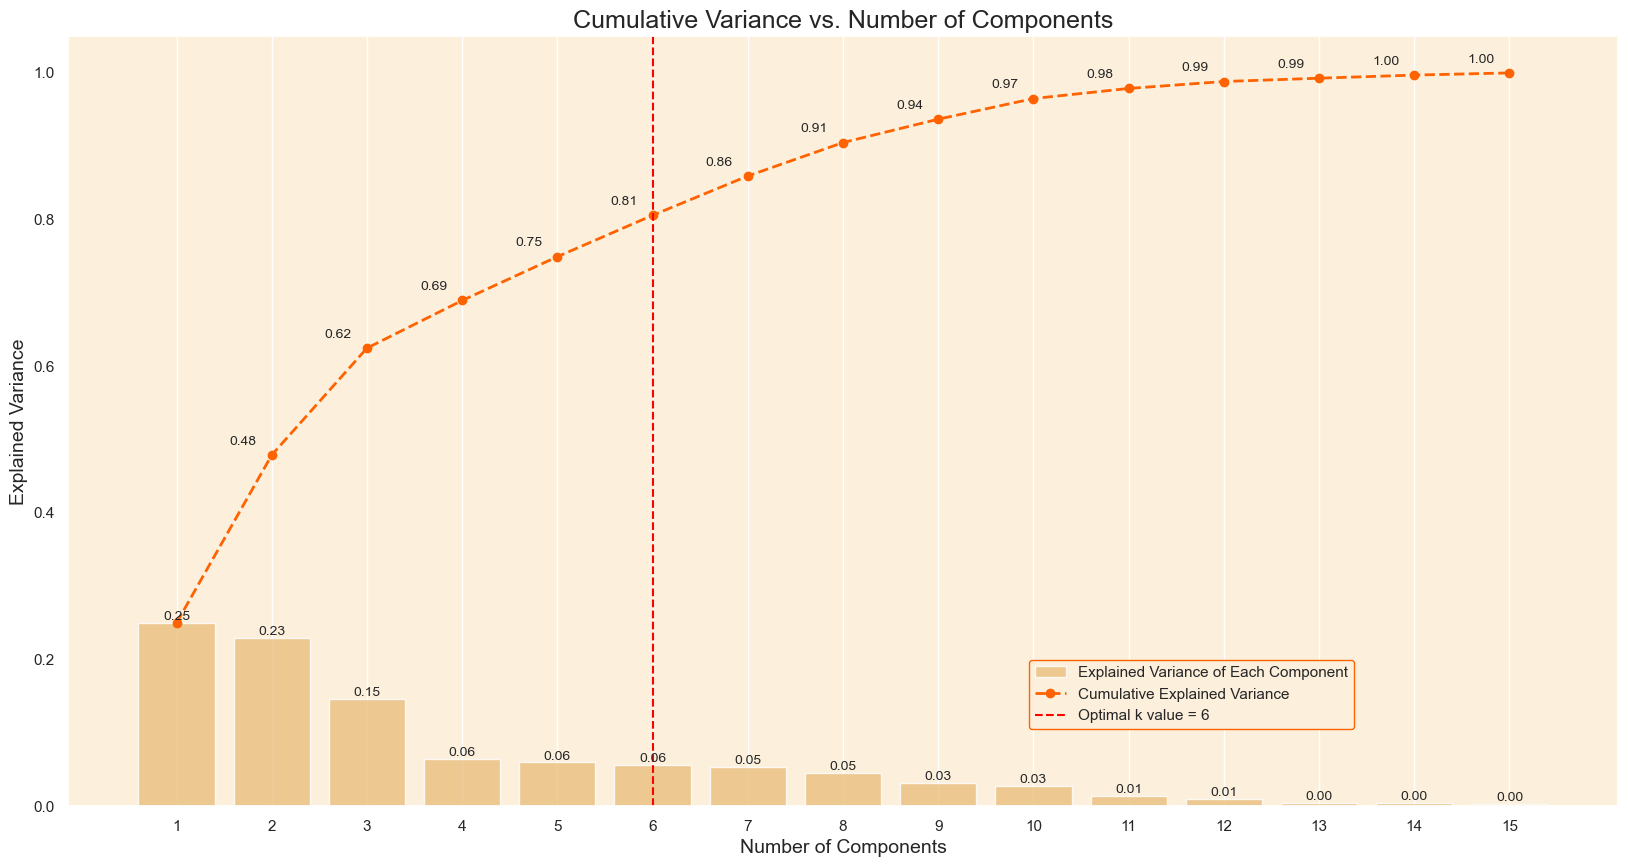

In [56]:
# Setting CustomerID as the index column
customer_data_scaled.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Conclusion </font></h3>
    
The plot and the cumulative explained variance values indicate how much of the total variance in the dataset is captured by each principal component, as well as the cumulative variance explained by the first n components.

Here, we can observe that:

- The first component explains approximately 28% of the variance.

- The first two components together explain about 49% of the variance.

- The first three components explain approximately 61% of the variance, and so on.

    
To choose the optimal number of components, we generally look for a point where adding another component doesn't significantly increase the cumulative explained variance, often referred to as the "__elbow point__" in the curve.

From the plot, we can see that the increase in cumulative variance starts to slow down after the __6th component__ (which __captures about 81% of the total variance__).

Considering the context of customer segmentation, we want to retain a sufficient amount of information to identify distinct customer groups effectively. Therefore, retaining __the first 6 components__ might be a balanced choice, as they together explain a substantial portion of the total variance while reducing the dimensionality of the dataset.

In [57]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

In [58]:
# Displaying the resulting dataframe based on the PCs
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12347.0,3.136427,3.032869,1.764218,-0.614658,-0.133848,0.756061
12348.0,-1.352906,1.082503,0.663087,0.820585,0.235078,-0.817990
12350.0,-1.611236,0.999233,0.609403,-0.983944,-0.726701,0.666122
12352.0,-1.384127,-0.963746,-0.096363,-0.718004,0.370623,0.274680
12355.0,-0.838414,3.064904,1.179189,0.064281,-0.189365,-0.098085


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

Now, let's extract the coefficients corresponding to each principal component to better understand the transformation performed by PCA:

In [59]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6
Days_Since_Last_Purchase,-0.221440,-0.031232,0.081028,-0.042942,-0.180903,-0.013759
Total_Transactions,0.385653,0.001548,-0.236700,-0.123715,0.120703,0.037245
Total_Products_Purchased,0.404204,-0.003720,0.136794,-0.053758,0.091378,0.009233
Total_Spend,0.444340,-0.004817,0.135617,-0.020463,0.050758,0.031619
Average_Transaction_Value,0.200103,-0.008754,0.506934,0.182327,-0.136858,-0.033789
Unique_Products_Purchased,0.323734,-0.000794,0.053892,-0.314126,0.007033,0.106002
Average_Days_Between_Purchases,-0.001269,0.027924,-0.081454,0.438361,0.439633,0.749253
Day_Of_Week,0.002503,-0.998513,-0.022677,0.035142,0.015357,0.008821
Hour,-0.028947,-0.025661,0.010123,-0.647991,-0.338081,0.571688
Is_UK,0.001508,0.001393,-0.011781,-0.019961,-0.003518,0.021442


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h2 align="left"><font color=#ff6200>K-Means:</font></h2>

- __K-Means__ is an unsupervised machine learning algorithm that clusters data into a specified number of groups (K) by minimizing the __within-cluster sum-of-squares (WCSS)__, also known as __inertia__. The algorithm iteratively assigns each data point to the nearest centroid, then updates the centroids by calculating the mean of all assigned points. The process repeats until convergence or a stopping criterion is reached. 

In [64]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))
             

    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

In [66]:
# Display the first few rows of the original dataframe
customer_data_cleaned.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12347.0,95,5,1467,2540.29,508.058,79,3.47619,0,14,0,0,0.0,635.0725,202.69804,-71.165
1,12348.0,220,1,268,327.0,327.0,4,0.0,2,10,0,0,0.0,327.0,0.0,0.0
2,12350.0,311,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0
3,12352.0,274,2,150,336.08,168.04,18,3.941176,4,14,0,0,0.0,168.04,90.071262,127.38
4,12355.0,96,1,240,459.4,459.4,13,0.0,0,13,0,0,0.0,459.4,0.0,0.0


In [67]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
<h2 align="left"><font color=#ff6200>Customer Profiles Derived from Radar Chart Analysis</font></h2>
    
<h3 align="left"><font color=red>Cluster 0 (Red Chart):</font></h3>

🎯 Profile: __Sporadic Shoppers with a Preference for Weekend Shopping__  

- Customers in this cluster tend to spend less, with a lower number of transactions and products purchased.  
- They have a slight tendency to shop during the weekends, as indicated by the very high `Day_of_Week` value.  
- Their spending trend is relatively stable but on the lower side, and they have a low monthly spending variation (low `Monthly_Spending_Std`).  
- These customers have not engaged in many cancellations, showing a low cancellation frequency and rate.  
- The average transaction value is on the lower side, indicating that when they do shop, they tend to spend less per transaction.  

____
    
<h3 align="left"><font color=green>Cluster 1 (Green Chart):</font></h3>    
 
🎯 Profile: __Infrequent Big Spenders with a High Spending Trend__  
    
- Customers in this cluster show a moderate level of spending, but their transactions are not very frequent, as indicated by the high `Days_Since_Last_Purchase` and `Average_Days_Between_Purchases`.  
- They have a very high spending trend, indicating that their spending has been increasing over time.  
- These customers prefer shopping late in the day, as indicated by the high `Hour` value, and they mainly reside in the UK.  
- They have a tendency to cancel a moderate number of transactions, with a medium cancellation frequency and rate.  
- Their average transaction value is relatively high, meaning that when they shop, they tend to make substantial purchases.  

____
    
<h3 align="left"><font color=blue>Cluster 2 (Blue Chart):</font></h3>   

🎯 Profile: __Frequent High-Spenders with a High Rate of Cancellations__
    
- Customers in this cluster are high spenders with a very high total spend, and they purchase a wide variety of unique products.  
- They engage in frequent transactions, but also have a high cancellation frequency and rate.  
- These customers have a very low average time between purchases, and they tend to shop early in the day (low `Hour` value).  
- Their monthly spending shows high variability, indicating that their spending patterns might be less predictable compared to other clusters.  
- Despite their high spending, they show a low spending trend, suggesting that their high spending levels might be decreasing over time.  